# Análise descritiva

Calcular medidas de tendência central (média, mediana, moda) e dispersão (desvio padrão, variância). Criar visualizações como histogramas, gráficos de barras e dispersão para representar os dados e obter insights sobre vendas, comportamento do cliente e desempenho de marketing.

## Instalação das bibliotecas

In [9]:
%pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Leitura das tabelas

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os datasets
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
product_category_translation = pd.read_csv("product_category_name_translation.csv")

## Primeiras Análises

In [11]:
# Análise descritiva para variáveis numéricas
print("\nAnálise Descritiva de 'price' em 'order_items':")
print(order_items['price'].describe())

print("\nAnálise Descritiva de 'freight_value' em 'order_items':")
print(order_items['freight_value'].describe())


# Análise descritiva por categoria
# 1. Merge order_items com products para obter a categoria
order_items_with_category = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')

# 2. Calcula o preço médio por categoria traduzida
preco_medio_por_categoria = order_items_with_category.groupby('product_category_name')['price'].mean()

# Imprime o resultado
print("\nPreço médio por categoria de produto:")
print(preco_medio_por_categoria)

# Contagem de pedidos por status
print("\nContagem de pedidos por status:")
print(orders['order_status'].value_counts())




Análise Descritiva de 'price' em 'order_items':
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

Análise Descritiva de 'freight_value' em 'order_items':
count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

Preço médio por categoria de produto:
product_category_name
agro_industria_e_comercio    342.124858
alimentos                     57.634137
alimentos_bebidas             54.602446
artes                        115.802105
artes_e_artesanato            75.583750
                                ...    
sinalizacao_e_seguranca      108.086583
tablets_impressao_imagem      90.703735
telefonia                     71.213978
telefonia_fixa               225.693182
u

## Análise do Valor Total dos Pedidos

count    98666.000000
mean       160.577638
std        220.466087
min          9.590000
25%         61.980000
50%        105.290000
75%        176.870000
max      13664.080000
Name: total_value, dtype: float64


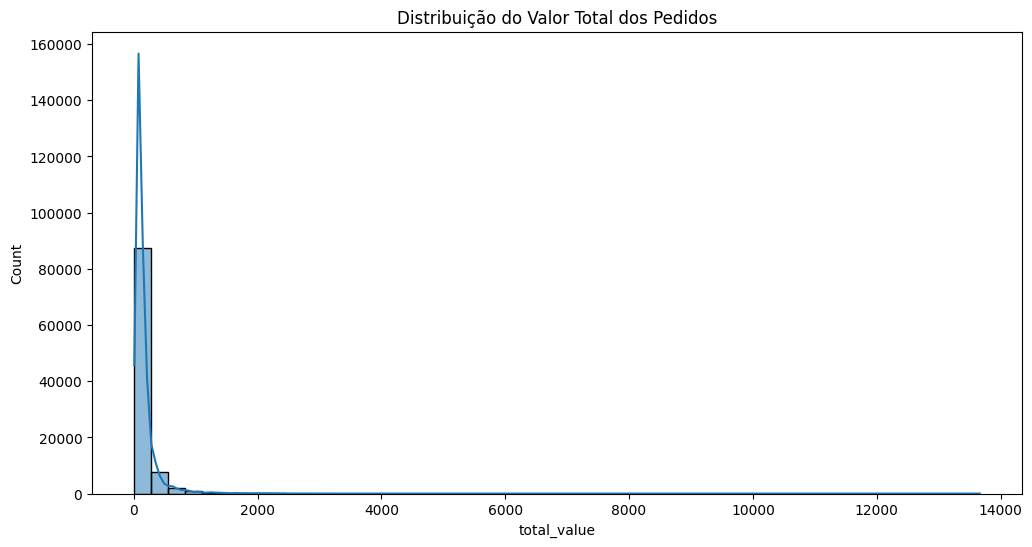


Pedidos com maior valor:
                               order_id                       customer_id  \
13390  03caa2c082116e1d31e67e9ae3700499  1617b1357756262bfa56ab541c47bc16   
66599  736e1922ae60d0d6a89247b851902527  ec5b2ba62e574342386871631fafd3fc   
22171  0812eb902a67711a1cb742b3cdaa65ae  c6e2731c5b391845f6800c97401a43a9   
28326  fefacc66af859508bf1a7934eab1e97f  f48d464a0baaea338cb25f816991ab1f   
3508   f5136e38d1a14a4dbd87dff67da82701  3fd6777bbce08a352fddd04e4a7cc8f6   

      order_status order_purchase_timestamp    order_approved_at  \
13390    delivered      2017-09-29 15:24:52  2017-10-02 15:28:20   
66599    delivered      2018-07-15 14:49:44  2018-07-17 04:31:36   
22171    delivered      2017-02-12 20:37:36  2017-02-12 20:45:12   
28326    delivered      2018-07-25 18:10:17  2018-07-27 04:05:13   
3508     delivered      2017-05-24 18:14:34  2017-05-26 02:45:17   

      order_delivered_carrier_date order_delivered_customer_date  \
13390          2017-10-10 15:43:17

In [12]:
# Calcula o valor total de cada pedido
order_items['total_value'] = order_items['price'] + order_items['freight_value']

# Agrupa por pedido e soma o valor total dos itens
order_totals = order_items.groupby('order_id')['total_value'].sum().reset_index()

# Junta com o dataset de pedidos para ter mais informações
orders = pd.merge(orders, order_totals, on='order_id', how='left')

# Analisa a distribuição do valor total dos pedidos
print(orders['total_value'].describe())

# Visualiza a distribuição
plt.figure(figsize=(12, 6))
sns.histplot(orders['total_value'], bins=50, kde=True)
plt.title('Distribuição do Valor Total dos Pedidos')
plt.show()

# Pedidos com maior valor
print("\nPedidos com maior valor:")
print(orders.sort_values('total_value', ascending=False).head())

## Análise do Tempo de Entrega


Análise do Tempo de Entrega:
count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64


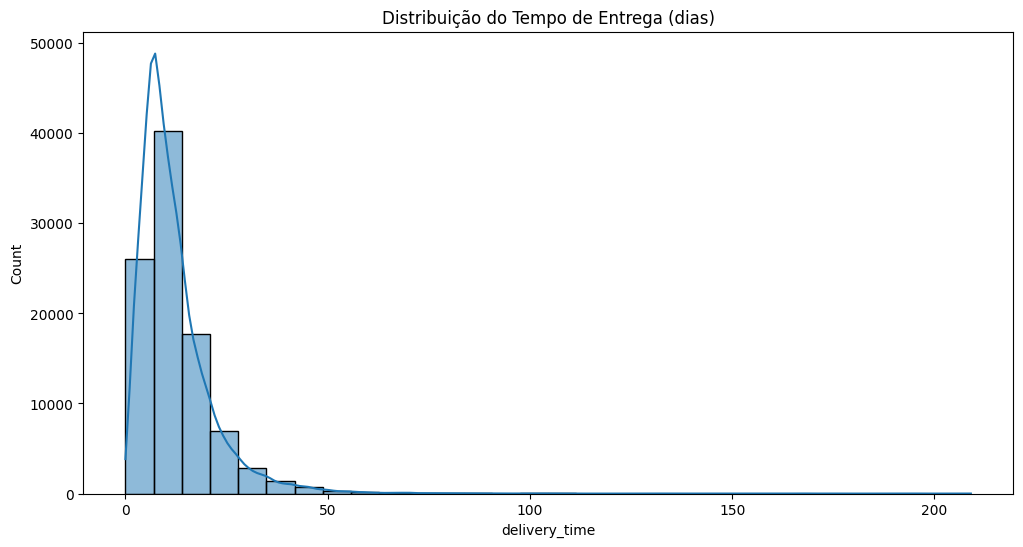

In [13]:
# Converte as colunas de data para o tipo datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])


# Calcula o tempo de entrega em dias
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Calcula a diferença entre a data estimada e a data real de entrega
orders['delivery_diff'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).dt.days

# Analisa o tempo de entrega
print("\nAnálise do Tempo de Entrega:")
print(orders['delivery_time'].describe())


# Visualiza a distribuição do tempo de entrega
plt.figure(figsize=(12, 6))
sns.histplot(orders['delivery_time'], bins=30, kde=True)
plt.title('Distribuição do Tempo de Entrega (dias)')
plt.show()

## Análise das Avaliações


Análise das Avaliações:
count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64


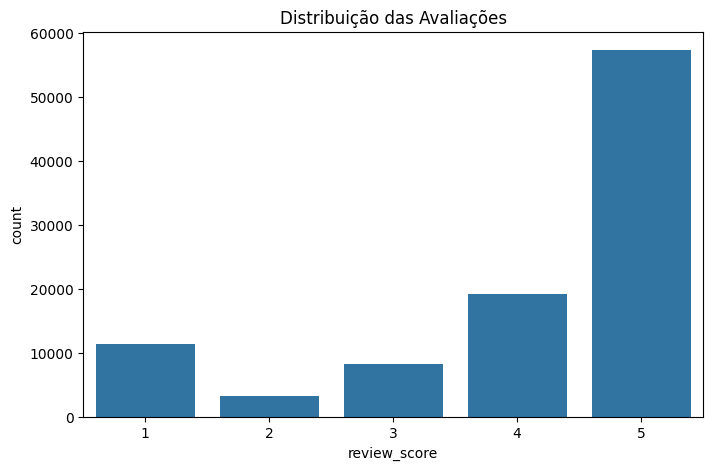

In [14]:
# Junta as avaliações com os dados dos pedidos
orders = pd.merge(orders, order_reviews, on='order_id', how='left')


# Analisa a distribuição das avaliações
print("\nAnálise das Avaliações:")
print(order_reviews['review_score'].describe())

plt.figure(figsize=(8,5))
sns.countplot(x='review_score', data=order_reviews)
plt.title('Distribuição das Avaliações')
plt.show()

## Análise dos Pagamentos


Análise dos Pagamentos:

Tipos de Pagamento Mais Comuns (Proporção):
payment_type
credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: proportion, dtype: float64


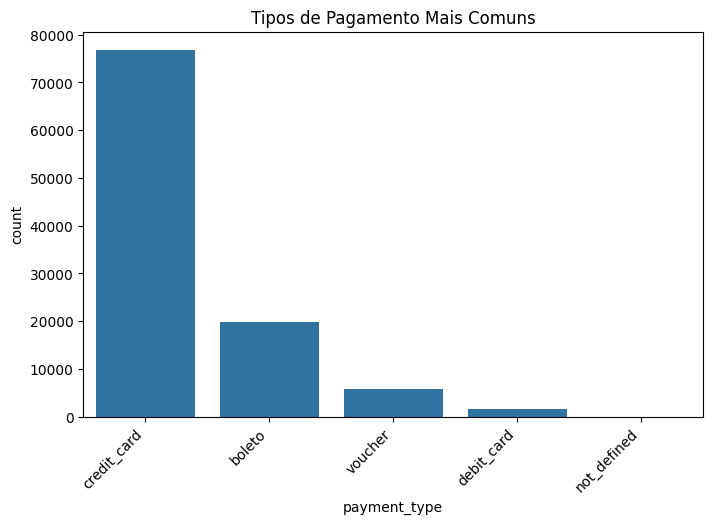


Valor Médio Pago por Tipo de Pagamento:
payment_type
boleto         145.034435
credit_card    163.319021
debit_card     142.570170
not_defined      0.000000
voucher         65.703354
Name: payment_value, dtype: float64


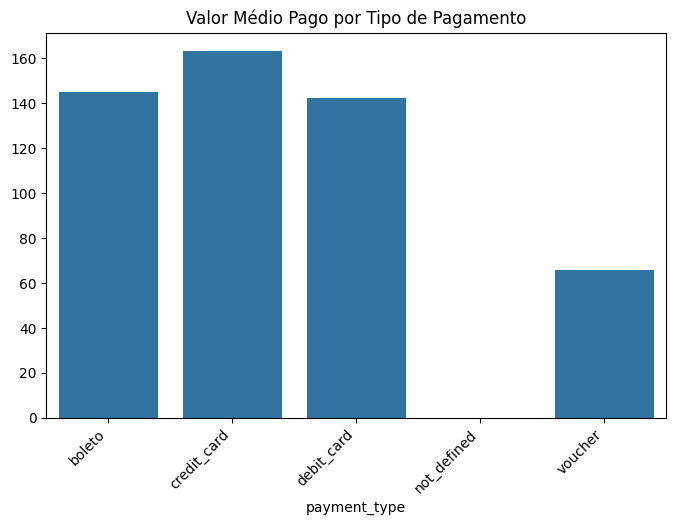

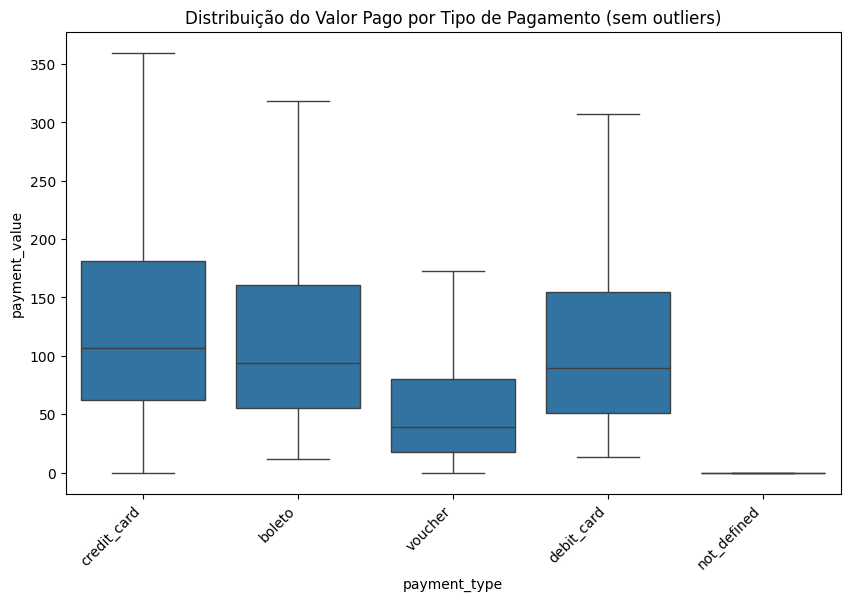


Número de Parcelas Mais Comuns (Proporção):
payment_installments
1     0.505804
2     0.119487
3     0.100697
4     0.068325
10    0.051287
5     0.050430
8     0.041083
6     0.037734
7     0.015652
9     0.006199
12    0.001280
15    0.000712
18    0.000260
11    0.000221
24    0.000173
20    0.000164
13    0.000154
14    0.000144
17    0.000077
16    0.000048
21    0.000029
0     0.000019
22    0.000010
23    0.000010
Name: proportion, dtype: float64


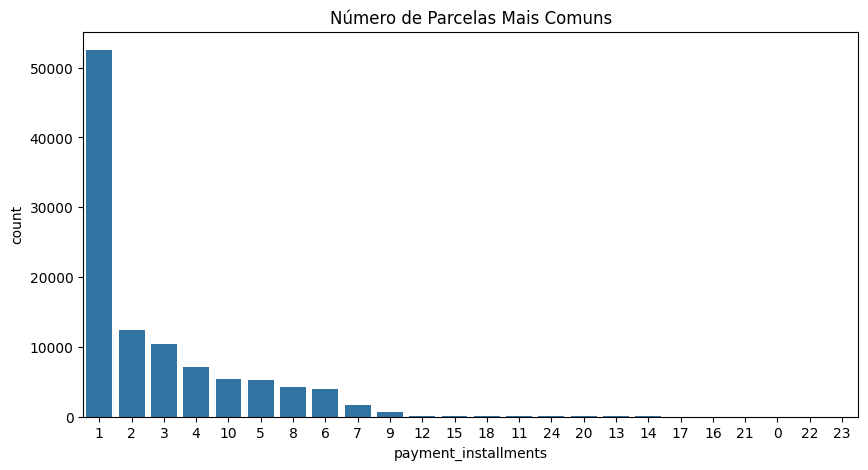

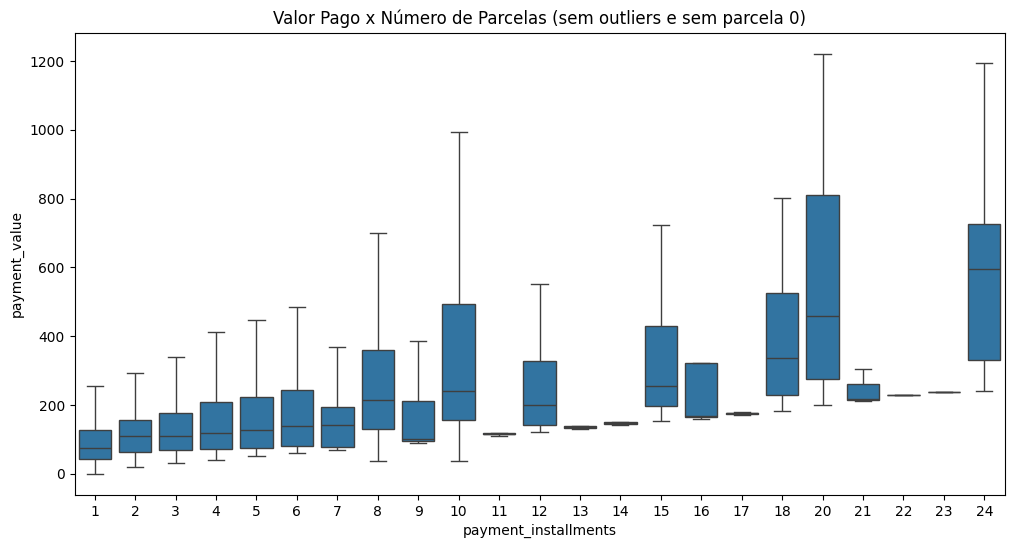


Correlação entre valor da parcela e número de parcelas: 0.3308091417006476


In [16]:
print("\nAnálise dos Pagamentos:")

# 1. Tipos de pagamento mais comuns
payment_types = order_payments['payment_type'].value_counts(normalize=True)
print("\nTipos de Pagamento Mais Comuns (Proporção):")
print(payment_types)

plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type', data=order_payments, order=payment_types.index)
plt.title('Tipos de Pagamento Mais Comuns')
plt.xticks(rotation=45, ha='right')
plt.show()


# 2. Valor médio pago por tipo de pagamento
mean_payment_by_type = order_payments.groupby('payment_type')['payment_value'].mean()
print("\nValor Médio Pago por Tipo de Pagamento:")
print(mean_payment_by_type)

plt.figure(figsize=(8, 5))
sns.barplot(x=mean_payment_by_type.index, y=mean_payment_by_type.values)
plt.title('Valor Médio Pago por Tipo de Pagamento')
plt.xticks(rotation=45, ha='right')
plt.show()


# 3. Distribuição do valor pago por tipo de pagamento
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='payment_value', data=order_payments, showfliers=False)  # showfliers=False remove outliers para melhor visualização
plt.title('Distribuição do Valor Pago por Tipo de Pagamento (sem outliers)')
plt.xticks(rotation=45, ha='right')
plt.show()



# 4. Número de parcelas mais comuns
installments = order_payments['payment_installments'].value_counts(normalize=True)
print("\nNúmero de Parcelas Mais Comuns (Proporção):")
print(installments)

plt.figure(figsize=(10, 5))
sns.countplot(x='payment_installments', data=order_payments, order=installments.index)
plt.title('Número de Parcelas Mais Comuns')
plt.show()


# 5. Valor pago por número de parcelas (remover a parcela 0 que indica pagamento à vista)
installments_no_zero = order_payments[order_payments['payment_installments'] != 0]

plt.figure(figsize=(12,6))
sns.boxplot(x='payment_installments', y='payment_value', data=installments_no_zero, showfliers=False)
plt.title('Valor Pago x Número de Parcelas (sem outliers e sem parcela 0)')
plt.show()



# 6. Correlação entre valor da parcela e número de parcelas
correlation = installments_no_zero['payment_value'].corr(installments_no_zero['payment_installments'])
print(f"\nCorrelação entre valor da parcela e número de parcelas: {correlation}")